In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet as pt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set_style('whitegrid')
plt.style.use("default")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn import preprocessing
from sklearn import metrics 
import tensorflow as tf
import joblib


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
from vnstock import *

d:\Projects\Time-series-forecasting\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


df = pd.DataFrame(listing_companies())\
search_word = 'mobile'\
result = df[df['organName'].str.contains(search_word)]\
print(result)

Vin = VIC\
Viettel = VGI\
FPT = FPT\
thế giới di động = MWG\
Petrolimex = PLC

In [99]:
df = pd.DataFrame(listing_companies())
search_word = 'FAHASA'
result = df[df['organName'].str.contains(search_word)]
print(result)



    ticker comGroupCode                                          organName  \
816    FHS        UPCOM  Công ty Cổ phần Phát hành sách Thành phố Hồ Ch...   

                     organShortName organTypeCode comTypeCode  \
816  Phát hành sách TP HCM - FAHASA            DN          CT   

                             icbName  \
816  Sách, ấn bản & sản phẩm văn hóa   

                                           icbNamePath             sector  \
816  Dịch vụ Tiêu dùng/Truyền thông/Truyền thông/Sá...  Dịch vụ Tiêu dùng   

         industry  ... VNCOND VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
816  Truyền thông  ...  False  False  False  False   False  False  False   

     VNMAT  VNREAL  VNUTI  
816  False   False  False  

[1 rows x 35 columns]


In [186]:
company_overview('FPT')
df = stock_historical_data("FPT", "2018-01-01", '2023-10-8', "1D")
df = pd.DataFrame(df)
close = df["close"].tolist()

In [2]:
companyName = 'AMZN'
start_date = '2020-04-05'
end_date = '2023-04-05'
df = yf.download(companyName, start_date, end_date)
#close = df["Close"].tolist()

[*********************100%%**********************]  1 of 1 completed


In [38]:
#foreign companies
start_date = dt.datetime(2016, 10, 1)
end_date = dt.datetime(2021, 9, 30)
df = pdr.get_data_yahoo('GOOG', start_date, end_date)
#df = yf.download('GOOG', start=start_date, end=end_date)
display(df.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,38.712502,38.803249,38.474998,38.627998,38.627998,25576000
2016-10-04,38.801498,38.935501,38.644501,38.821499,38.821499,24028000
2016-10-05,38.965500,39.103500,38.782501,38.823502,38.823502,29224000
2016-10-06,38.950001,39.023998,38.777000,38.842999,38.842999,21414000
2016-10-07,38.983002,38.983002,38.537498,38.754002,38.754002,18664000


In [3]:
df = df.rename(columns={'Open': 'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

# LSTM MODEL

In [4]:
df.describe()

,open,high,low,close,Adj Close,volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,142.607822,144.477626,140.573704,142.523591,142.523591,7.733598e+07
std,27.912342,27.888628,27.829732,27.805290,27.805290,3.152092e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.903800e+07
25%,118.438000,119.849998,116.180000,118.388252,118.388252,5.618545e+07
50%,154.913498,156.644501,151.856995,154.474503,154.474503,6.826800e+07
75%,164.783997,166.318756,162.964256,164.654999,164.654999,9.035300e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.726620e+08


In [5]:
df = pd.DataFrame(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-04-06 to 2023-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       755 non-null    float64
 1   high       755 non-null    float64
 2   low        755 non-null    float64
 3   close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,Date,open,high,low,close,Adj Close,volume
0,2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
1,2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000
2,2020-04-08,101.050003,102.199997,100.557503,102.150002,102.150002,79546000
3,2020-04-09,102.214996,102.650002,100.883003,102.138000,102.138000,92930000
4,2020-04-13,102.000000,109.000000,101.900002,108.443497,108.443497,134334000


In [9]:
df.rename(columns={'Date':'date'},inplace=True)

In [10]:
df1 = df

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       755 non-null    datetime64[ns]
 1   open       755 non-null    float64       
 2   high       755 non-null    float64       
 3   low        755 non-null    float64       
 4   close      755 non-null    float64       
 5   Adj Close  755 non-null    float64       
 6   volume     755 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.4 KB


Check distribution of each features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22320\332507856.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column], color='#75f8f2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22320\332507856.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column], color='#75f8f2')


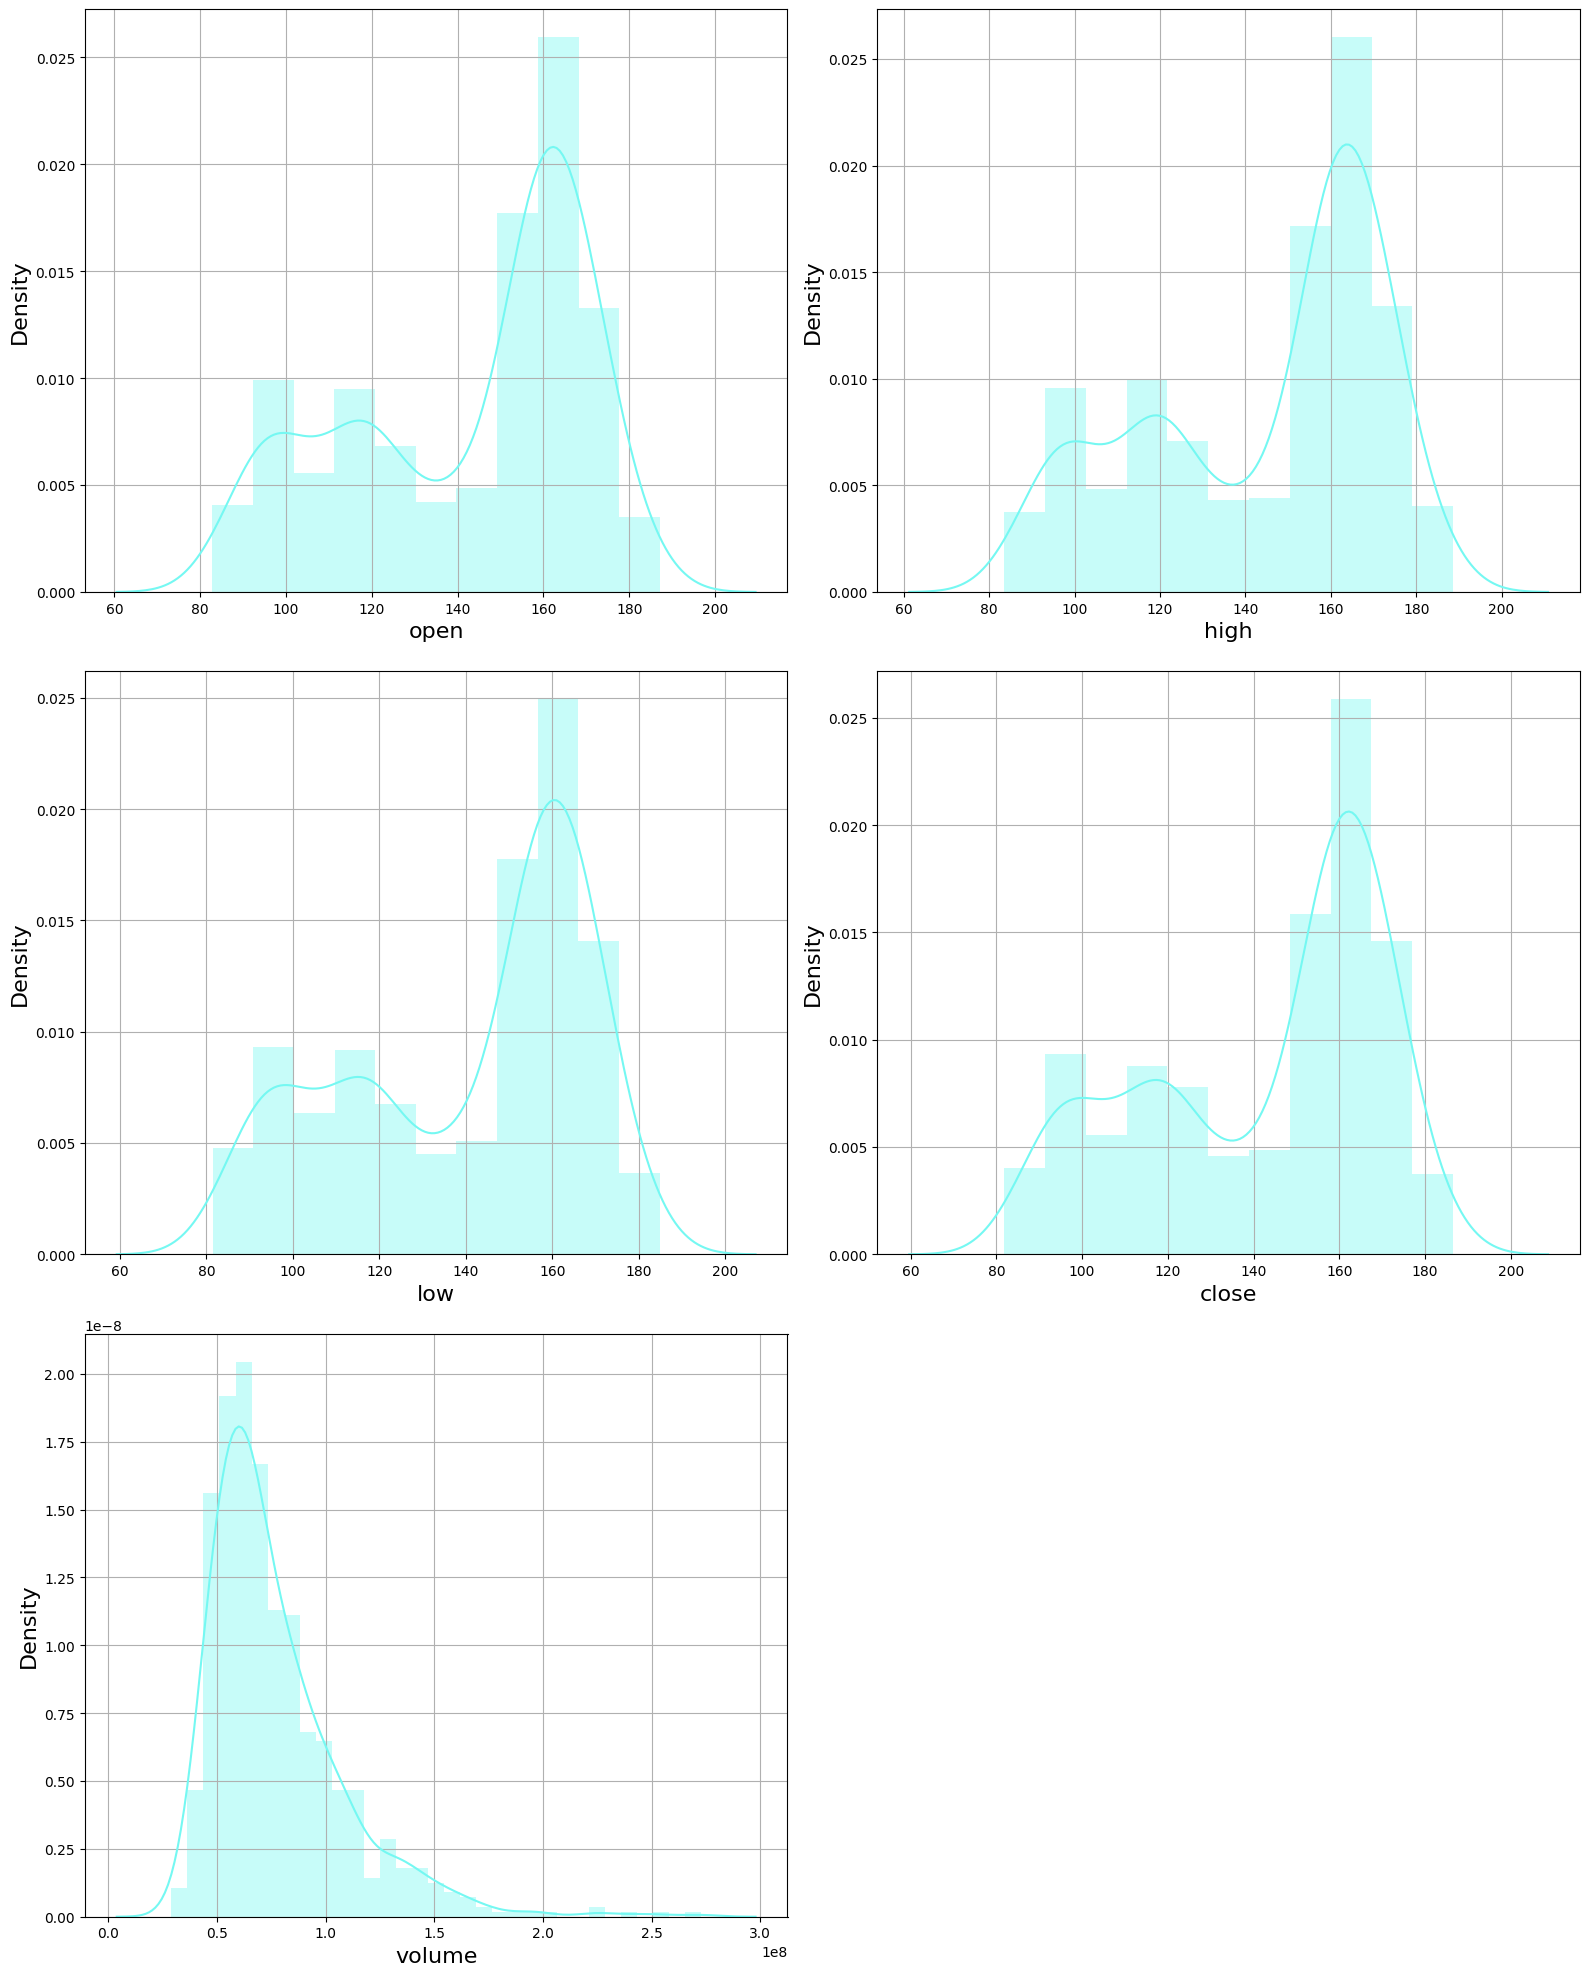

In [12]:
features = ['open', 'high', 'low', 'close', 'volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(4, 2, idx + 1)
    sns.distplot(df, x=df[column], color='#75f8f2')
    #plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()

checking The Behavior Of Features In Relation To 'close'

In [ ]:
features = ['open', 'high', 'low', 'volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['close'], y=df[column] , data = df, color='orange')
    #plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

Boxplot distribution

In [ ]:
features = ['open', 'high', 'low', 'close', 'volume']
fig  = plt.subplots(nrows = 1, ncols = 6,figsize = (25,5))
for i in range(len(features)) :
    plt.subplot(1, 6,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()


In [ ]:
features = ['open', 'high', 'low', 'close', 'volume']
plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(4, 2, idx + 1)
    plt.plot(df[column])
    #plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.grid()



Moving average:

A moving average (MA), a popular technical indicator, smoothes price movements by removing the noise from erratic short-term price swings. There are numerous ways to build moving averages, and the number of days used for the averaging interval might vary. The average is calculated over a predetermined time frame, such as weeks, days, hours, minutes.

In [13]:
# New Style
plt.style.use("fivethirtyeight")

In [14]:
df1= df.copy()

In [15]:
df1.head()

,date,open,high,low,close,Adj Close,volume
0,2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
1,2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000
2,2020-04-08,101.050003,102.199997,100.557503,102.150002,102.150002,79546000
3,2020-04-09,102.214996,102.650002,100.883003,102.138000,102.138000,92930000
4,2020-04-13,102.000000,109.000000,101.900002,108.443497,108.443497,134334000


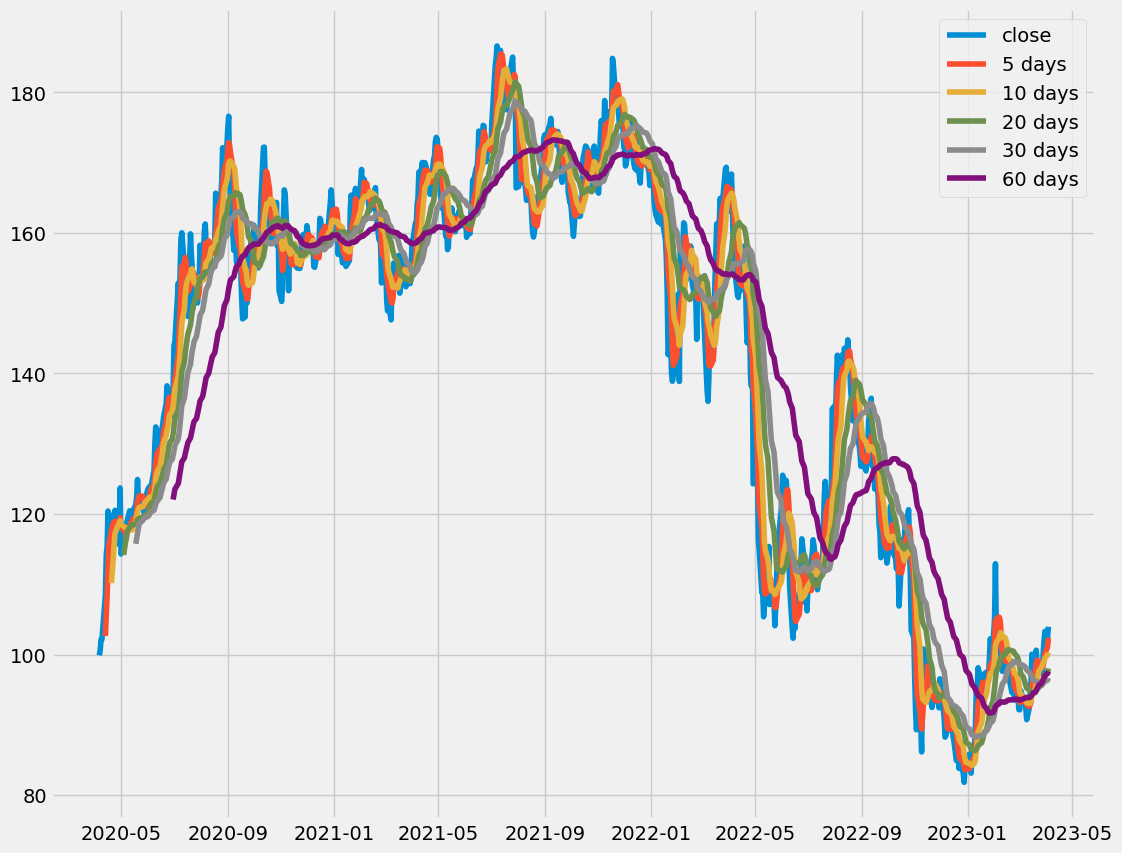

In [16]:
# Checking and choosing the best time step
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['close'].rolling(MA).mean()   

plt.figure(figsize=(12,10))

plt.plot(df1['date'],df1['close'],label='close')
plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

Prepering dataset(Train, Test) to using in RNN Models

In [17]:
# Copy from df1
df2= df1.copy()

In [18]:
# Normalaze Data For Create Trin and Test with new dataframe with only the 'Close' column 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close'])) 
# now have a scaled dataframe with 'colose column'
df3=pd.DataFrame(scaled, columns=['close'])

In [19]:
print(df3.head())
print(df3.describe())

      close
0  0.172405
1  0.179092
2  0.194080
3  0.193966
4  0.254161
            close
count  755.000000
mean     0.579506
std      0.265443
min      0.000000
25%      0.349099
50%      0.693596
75%      0.790784
max      1.000000


Examining the divisions of Test and Train

In [20]:
# Finding a Length of %90 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .9 )) 
print('Length of %90 of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.close) - new_dataset_length)

Length of %90 of Dataset is  680  Therefore, the test data length is  75


Creating Train and Test from the column of 'close'

In [21]:
# Create the training data set with 20 time steps 
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.17240493, 0.17909225, 0.19408024, 0.19396568, 0.25416106,
       0.30879091, 0.32041856, 0.36839444, 0.35255203, 0.36143501,
       0.33017503, 0.34705802, 0.36422266, 0.36936342, 0.35302939,
       0.32347343, 0.35145894, 0.39980715, 0.31008925, 0.3243851 ])]
[0.3252490539413484]

[array([0.17240493, 0.17909225, 0.19408024, 0.19396568, 0.25416106,
       0.30879091, 0.32041856, 0.36839444, 0.35255203, 0.36143501,
       0.33017503, 0.34705802, 0.36422266, 0.36936342, 0.35302939,
       0.32347343, 0.35145894, 0.39980715, 0.31008925, 0.3243851 ]), array([0.17909225, 0.19408024, 0.19396568, 0.25416106, 0.30879091,
       0.32041856, 0.36839444, 0.35255203, 0.36143501, 0.33017503,
       0.34705802, 0.36422266, 0.36936342, 0.35302939, 0.32347343,
       0.35145894, 0.39980715, 0.31008925, 0.3243851 , 0.32524905])]
[0.3252490539413484, 0.34122037833314645]



In [22]:
# Converting the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshape the X_train 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# Create Models: LSTM, ARIMA, Random forest, Transformer

LSTM

In [23]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()
# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))
# The Second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
21/21 [==============================] - 16s 161ms/step - loss: 0.0568 - accuracy: 0.0015 - val_loss: 9034.0527 - val_accuracy: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 1s 50ms/step - loss: 0.0091 - accuracy: 0.0015 - val_loss: 9043.3096 - val_accuracy: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 1s 49ms/step - loss: 0.0057 - accuracy: 0.0015 - val_loss: 9052.2988 - val_accuracy: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 1s 49ms/step - loss: 0.0049 - accuracy: 0.0015 - val_loss: 9057.0400 - val_accuracy: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 1s 61ms/step - loss: 0.0046 - accuracy: 0.0015 - val_loss: 9058.7236 - val_accuracy: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 1s 64ms/step - loss: 0.0043 - accuracy: 0.0015 - val_loss: 9058.5137 - val_accuracy: 0.0000e+00
Epoch 7/10
21/21 [==============================] - 1s 54ms/step - loss: 0.0041 - accuracy: 0.0015 - val_loss:

In [24]:
# Geting The Model Predicted Price Values 
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

3/3 [==============================] - 3s 15ms/step


In [25]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions1)}')

Mean Absolute Error: 3.31577626546224
Mean Squared Error: 16.258877817464533
Root Mean Squared Error: 4.032229881525176
R2_Score: 0.5970364458228004
Mean Absolute Percentage Error: 0.03500379623124172


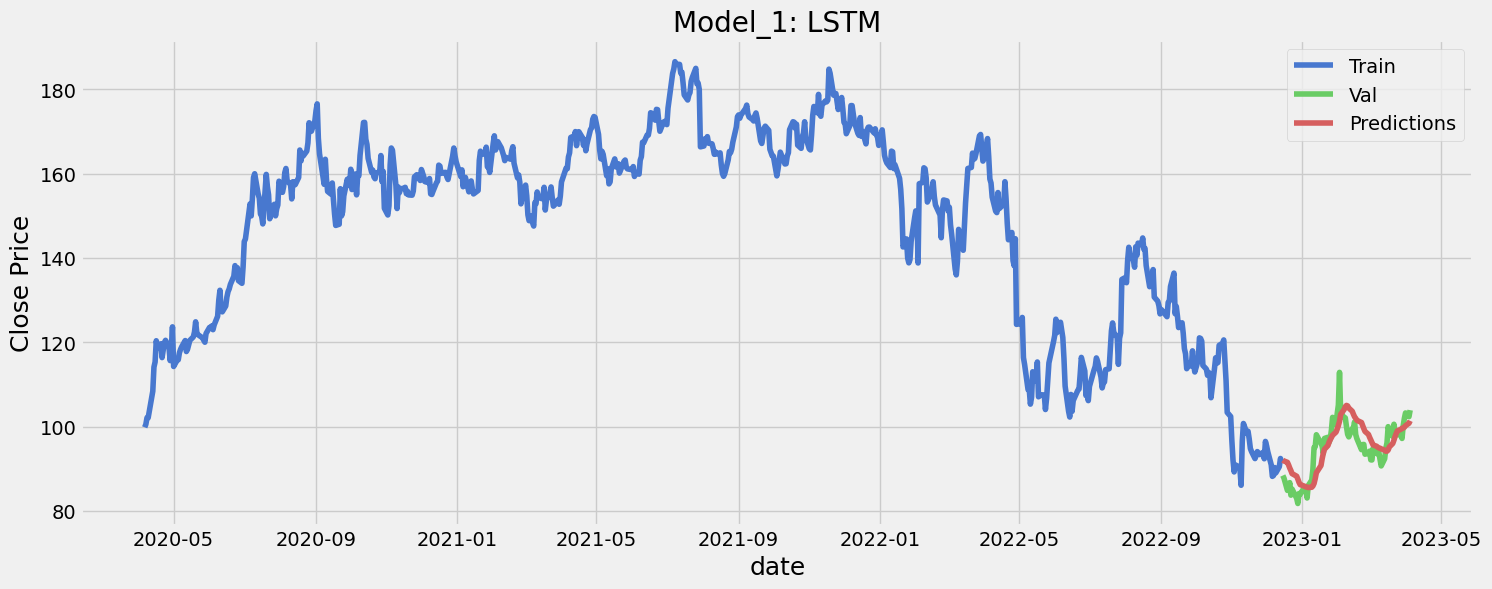

In [26]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1: LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

GRU

In [28]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))
# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
21/21 [==============================] - 8s 84ms/step - loss: 0.0669 - accuracy: 0.0000e+00 - val_loss: 9039.4824 - val_accuracy: 0.0000e+00
Epoch 2/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0064 - accuracy: 0.0015 - val_loss: 9043.2500 - val_accuracy: 0.0000e+00
Epoch 3/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0033 - accuracy: 0.0015 - val_loss: 9049.6162 - val_accuracy: 0.0000e+00
Epoch 4/10
21/21 [==============================] - 1s 27ms/step - loss: 0.0023 - accuracy: 0.0015 - val_loss: 9055.1445 - val_accuracy: 0.0000e+00
Epoch 5/10
21/21 [==============================] - 1s 27ms/step - loss: 0.0020 - accuracy: 0.0015 - val_loss: 9058.5244 - val_accuracy: 0.0000e+00
Epoch 6/10
21/21 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 0.0015 - val_loss: 9059.1533 - val_accuracy: 0.0000e+00
Epoch 7/10
21/21 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.0015 - val_los

In [31]:
# Geting The Model Predicted Price Values 
predictionsGRU = RNN2.predict(X_test)
# Converting scaled number to actual number
predictionsGRU = scaler.inverse_transform(predictionsGRU)

3/3 [==============================] - 0s 7ms/step


In [33]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictionsGRU)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictionsGRU)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictionsGRU))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictionsGRU)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictionsGRU)}')

Mean Absolute Error: 2.3864212036132812
Mean Squared Error: 8.760009246832539
Root Mean Squared Error: 2.9597312794969306
R2_Score: 0.7828900308890292
Mean Absolute Percentage Error: 0.025021761997471133


Random forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
randFor_X_train = X_train.reshape((X_train.shape[0], -1))

In [95]:
RandFor = RandomForestRegressor(n_estimators=1000)
RandFor.fit(randFor_X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [96]:
randFor_X_test = X_test.reshape((X_test.shape[0], -1))

In [97]:
# Geting The Model Predicted Price Values 
predictions2 = RandFor.predict(randFor_X_test)
# Rescale data to single feature
predictions2 = predictions2.reshape(-1,1)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

In [98]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions2)}')

Mean Absolute Error: 25.14992612524433
Mean Squared Error: 745.225468556133
Root Mean Squared Error: 27.298818079838785
R2_Score: -5.642050728484379
Mean Absolute Percentage Error: 0.1898368900923654


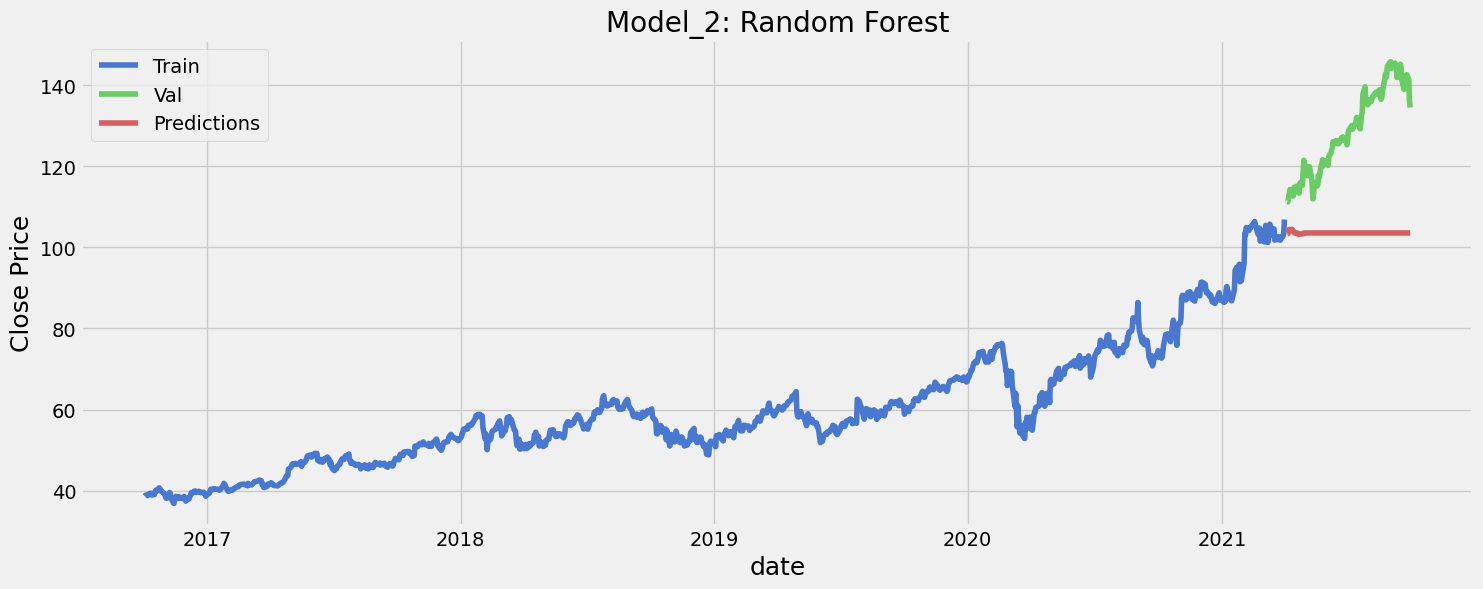

In [99]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2: Random Forest')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions2']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

Arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3936.274, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3930.036, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3930.306, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3939.724, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3931.724, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3931.504, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3933.473, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3934.430, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.708 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1257
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1962.018
Date:                Thu, 14 Dec 2023   AIC                           3930.036
Time:                        21:55:5

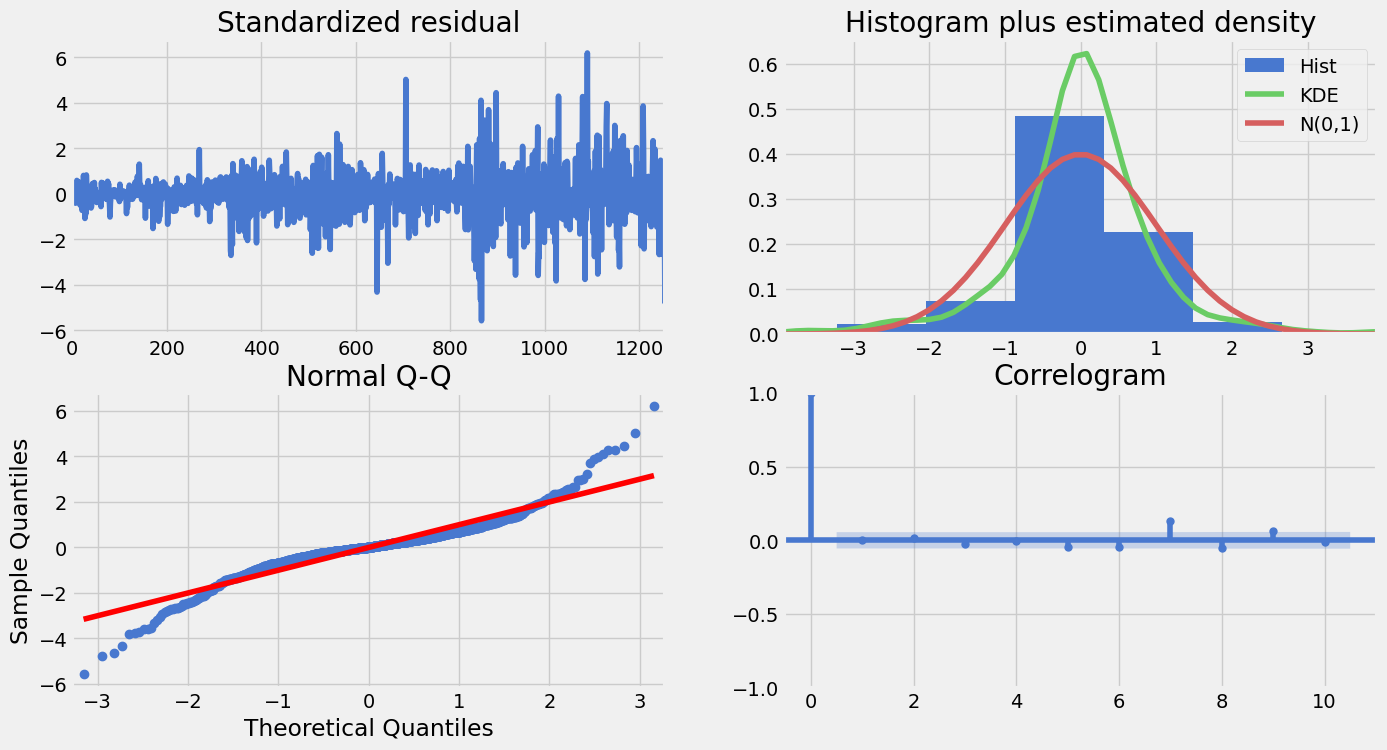

In [104]:
model_autoARIMA = auto_arima(df2['close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [109]:
model_ARIMA = sm.tsa.arima.ARIMA(df2['close'], order = (1,1,0))
Model_3 = model_ARIMA.fit()

To evaluate the performance of the model, you can use the walk-forward validation method. This method involves using the model to make a prediction for each step in the test set, then adding the actual observation from the test set to the history for the next prediction. The performance of the model can be evaluated by calculating the mean absolute error between the predicted and actual values

In [128]:
# Get the predictions
predictions3 = Model_3.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
predictions3 = predictions3.to_numpy().reshape(125,1)

In [129]:
predictions3

array([[102.36930695],
       [105.2006994 ],
       [101.5296663 ],
       [102.5264    ],
       [102.74263355],
       [105.51109635],
       [103.29717954],
       [103.30710485],
       [104.52691381],
       [104.55948225],
       [102.01982729],
       [102.1334331 ],
       [101.94704571],
       [102.59330136],
       [102.28307081],
       [102.22066664],
       [101.81103293],
       [102.71984568],
       [102.77856115],
       [103.3816747 ],
       [106.62438535],
       [110.94327704],
       [111.24054782],
       [112.3891028 ],
       [113.21201103],
       [114.21619218],
       [112.85784885],
       [113.31599611],
       [112.78931322],
       [114.67380798],
       [114.88381321],
       [115.10233996],
       [114.71488712],
       [114.66579207],
       [113.49257664],
       [115.58464308],
       [116.29345061],
       [115.4306879 ],
       [118.71841667],
       [121.30424537],
       [120.58125335],
       [119.81540761],
       [117.86826735],
       [117

In [131]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions3)}')

Mean Absolute Error: 6.989868481390606
Mean Squared Error: 63.61732462197017
Root Mean Squared Error: 7.976046929524059
R2_Score: 0.4329910675647336
Mean Absolute Percentage Error: 0.05496896482443612


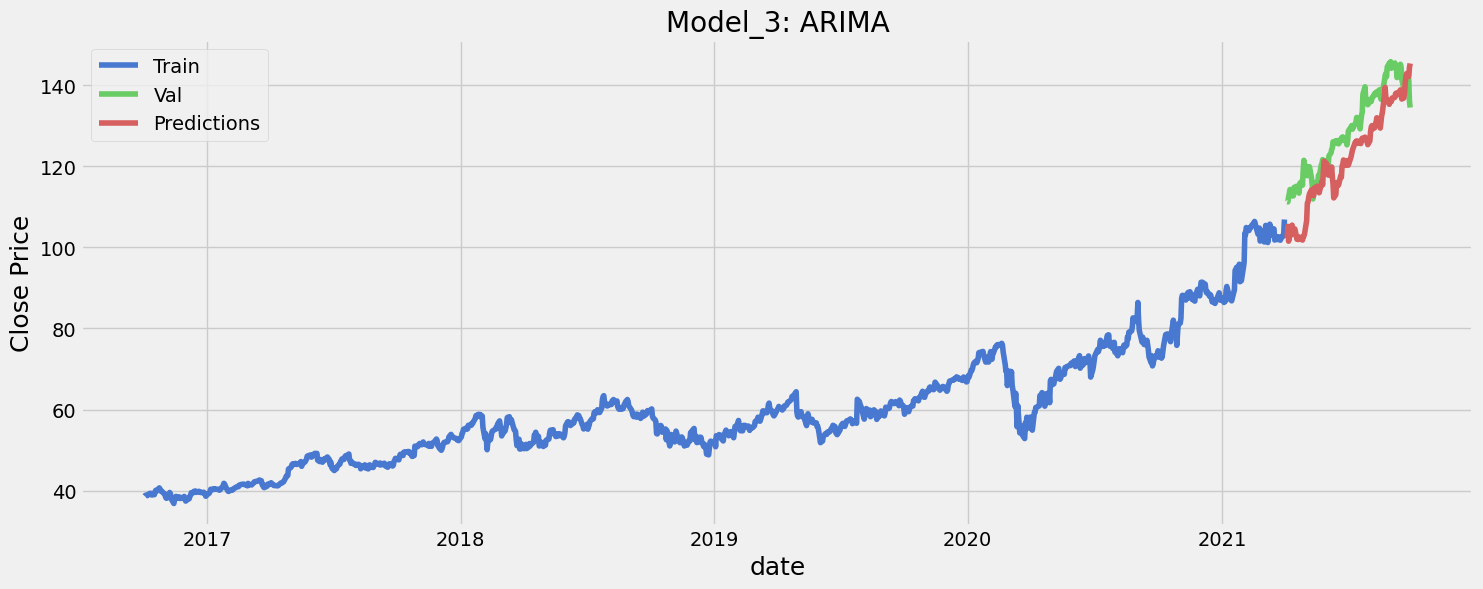

In [132]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_3: ARIMA')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions3']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

ARIMA

In [95]:
model_autoARIMA = auto_arima([X_train, y_train], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1112) + inhomogeneous part.

Time series analysis

In [12]:
df.drop(['High','Low','Volume','Close','Adj Close'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-03 to 2023-09-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


Text(0.5, 1.0, 'Trend of the Time Series')

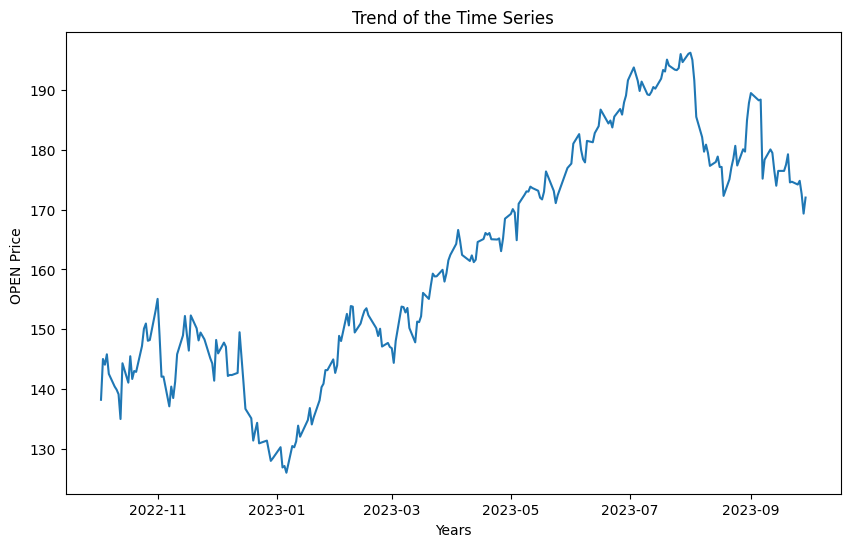

In [13]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('OPEN Price ')
plt.title('Trend of the Time Series')

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='month', ylabel='Open'>

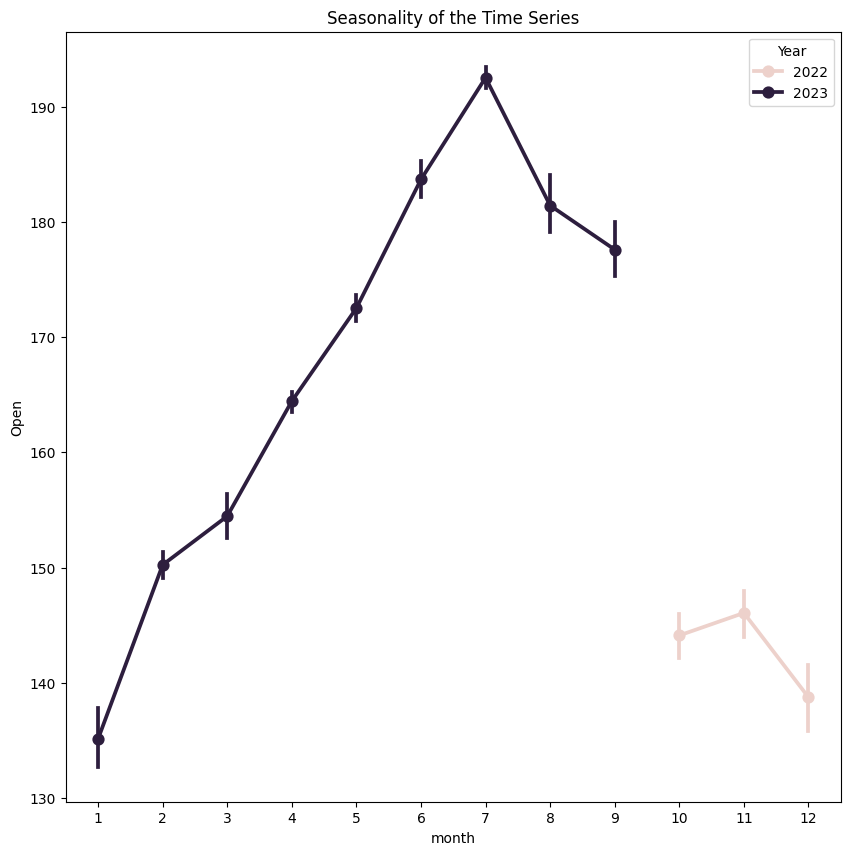

In [14]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='month',y='Open',hue='Year',data=df_temp)

In [15]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                  -1.383595
p-value                          0.590115
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
